In [29]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

In [30]:
# load the dataset
iris = load_iris()
df_data = pd.DataFrame(iris.data)
df_data

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [31]:
df_data.rename(
    columns={0:"sepal_lenght", 1:"sepal_width", 2:"petal_lenght", 3:"petal_width"}, inplace=True
)
df_data

,sepal_lenght,sepal_width,petal_lenght,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [32]:
df_target = pd.DataFrame(iris.target).rename(
    columns={
        0:"speice_name"
    }
)
df_target

,speice_name
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [35]:
# merge the tow datasets
df = pd.concat([df_data, df_target], axis=1)
df

,sepal_lenght,sepal_width,petal_lenght,petal_width,speice_name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [42]:
X = df.drop("speice_name", axis=1)
y = df["speice_name"]


In [ ]:
# split data to train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y
)

Using logis regression

In [44]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train,y_train)

LogisticRegression()

In [50]:
y_pred = log_reg_model.predict(X_test)

In [47]:
log_reg_model.score(X_test, y_test)

0.9473684210526315

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  1, 13]])

Text(0.5, 23.52222222222222, 'Truth')

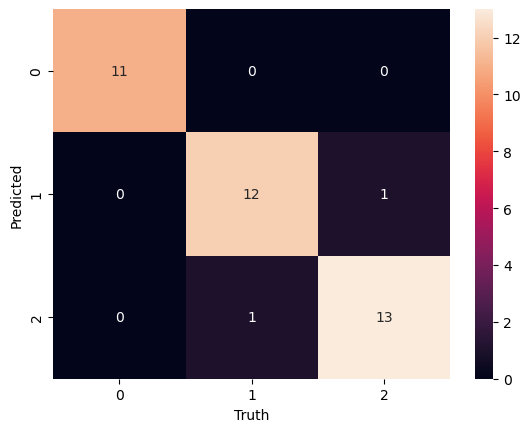

In [52]:
# pot the confusion matrix
import seaborn as sn
from matplotlib import pyplot as plt

sn.heatmap(cm, annot=True)
plt.ylabel("Predicted")
plt.xlabel("Truth")



In [53]:
# using kneighnor
k_neg_model = KNeighborsClassifier(n_neighbors=3)
k_neg_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [54]:
k_neg_model.score(X_test, y_test)

0.9473684210526315

In [56]:
y_pre_kneg = k_neg_model.predict(X_test)
y_pre_kneg

array([2, 1, 2, 0, 1, 2, 0, 0, 2, 1, 0, 1, 2, 2, 2, 1, 2, 0, 2, 2, 0, 1,
       2, 2, 0, 2, 0, 1, 0, 1, 1, 0, 2, 0, 2, 1, 1, 2])

In [57]:
accuracy_score(y_test, y_pre_kneg)

0.9473684210526315

In [58]:
cm_kn = confusion_matrix(y_test, y_pred)
cm_kn

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  1, 13]])